In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('used_phone.csv')

In [3]:
df.head(3)

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,Samsung,Galaxy A55 5G,8,256,Like New,61,2,39999,17567
1,Oppo,OPPO A58 5G,6,128,Fair,69,1,13999,5216
2,OnePlus,OnePlus Nord N30 SE 5G,4,128,Like New,69,1,13999,7824


In [4]:
df.shape

(5000, 9)

In [5]:
df.columns.to_list()

['brand',
 'model',
 'ram_gb',
 'storage_gb',
 'condition',
 'battery_health',
 'age_years',
 'original_price',
 'resale_price']

In [6]:
df.dtypes

brand             object
model             object
ram_gb             int64
storage_gb         int64
condition         object
battery_health     int64
age_years          int64
original_price     int64
resale_price       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           5000 non-null   object
 1   model           5000 non-null   object
 2   ram_gb          5000 non-null   int64 
 3   storage_gb      5000 non-null   int64 
 4   condition       5000 non-null   object
 5   battery_health  5000 non-null   int64 
 6   age_years       5000 non-null   int64 
 7   original_price  5000 non-null   int64 
 8   resale_price    5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


### Handling Null Values

In [8]:
df.isnull().sum()

brand             0
model             0
ram_gb            0
storage_gb        0
condition         0
battery_health    0
age_years         0
original_price    0
resale_price      0
dtype: int64

### Handling Duplicated Values

In [9]:
df.duplicated().sum()

np.int64(99)

In [10]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

### pre-Modelling

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_condition = LabelEncoder()

In [14]:
df['brand'] = le_brand.fit_transform(df['brand'])
df['model'] = le_brand.fit_transform(df['model'])
df['condition'] = le_brand.fit_transform(df['condition'])

In [15]:
df.head(3)

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,7,8,8,256,2,61,2,39999,17567
1,4,54,6,128,0,69,1,13999,5216
2,3,79,4,128,2,69,1,13999,7824


now ready for machine learning training

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4901 entries, 0 to 4900
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   brand           4901 non-null   int64
 1   model           4901 non-null   int64
 2   ram_gb          4901 non-null   int64
 3   storage_gb      4901 non-null   int64
 4   condition       4901 non-null   int64
 5   battery_health  4901 non-null   int64
 6   age_years       4901 non-null   int64
 7   original_price  4901 non-null   int64
 8   resale_price    4901 non-null   int64
dtypes: int64(9)
memory usage: 344.7 KB


### Training

In [17]:
# feature columns and target column
x = df.drop(columns='resale_price')
y = df['resale_price']

In [18]:
x.head(3)

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price
0,7,8,8,256,2,61,2,39999
1,4,54,6,128,0,69,1,13999
2,3,79,4,128,2,69,1,13999


In [19]:
y.head(3)

0    17567
1     5216
2     7824
Name: resale_price, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [24]:
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_predict = model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print('score of model',r2_score(y_predict,y_test))

score of model 0.9865101073189715


In [30]:
# check the model 
df.head(1)

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,7,8,8,256,2,61,2,39999,17567


In [33]:
model.predict([[7,8,8,256,2,61,2,39999]])

c:\Users\physi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([17398.04])

In [ ]:
# predicted = 17398
# actual = 17567

### Data visualisation

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

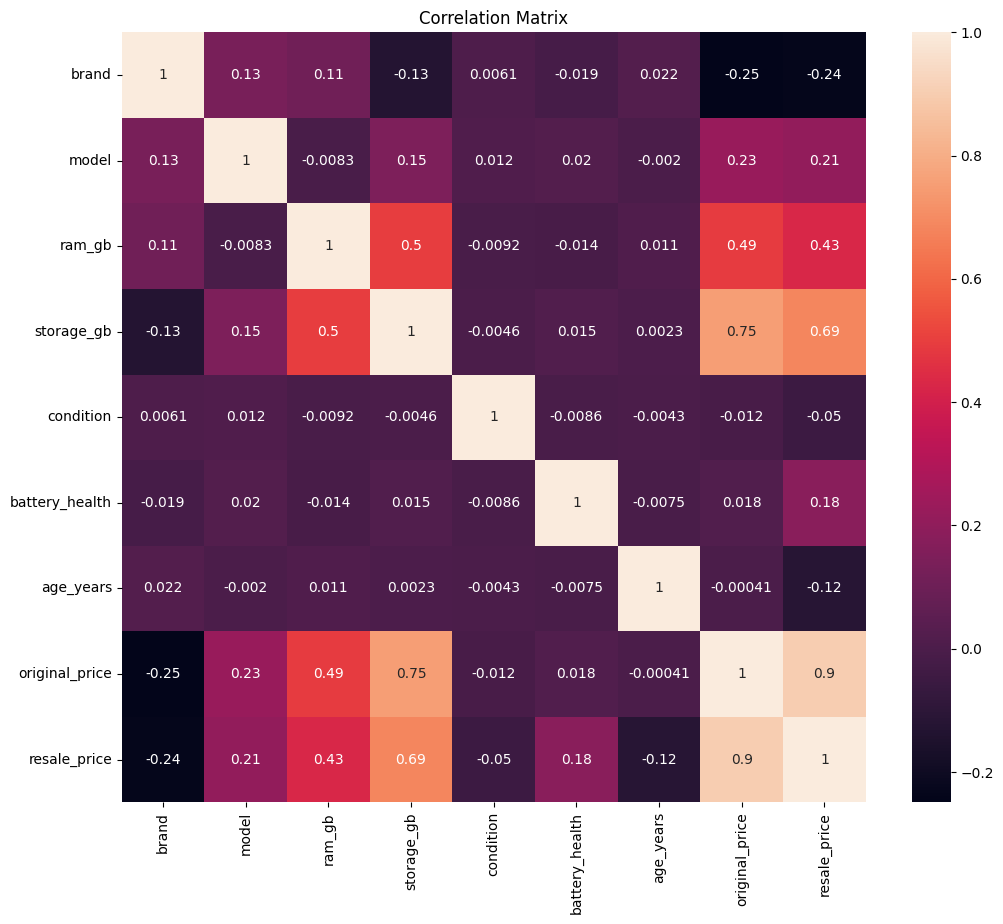

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [38]:
import pickle

In [39]:
with open("used_phone.pkl","wb") as f:
    pickle.dump(model,f)